In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [17]:
iris_data = load_iris()

In [18]:
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)


In [19]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
df['target'] = iris_data.target

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
df = df[df['target'] !=0] [['sepal width (cm)' , 'petal length (cm)' ,'target']]

In [23]:
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

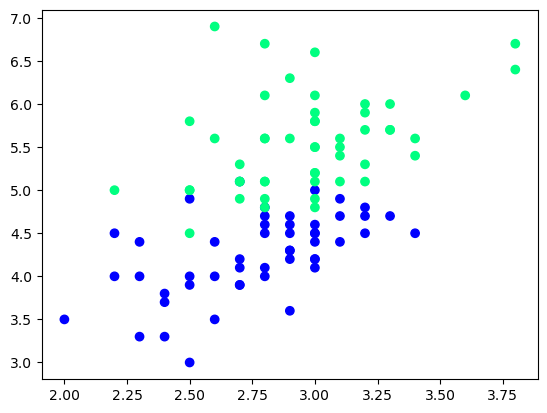

In [27]:
plt.scatter(df['sepal width (cm)'] , df['petal length (cm)'] , c=df['target'] ,cmap='winter')

In [28]:
#taking only 10 rows

In [29]:
df = df.sample(100)

In [34]:
df_train = df.iloc[:60 , :].sample(10)
df_val = df.iloc[60:80 , :].sample(5)
df_test = df.iloc[80: , :].sample(5)

In [35]:
df_train.head()

,sepal width (cm),petal length (cm),target
134,2.6,5.6,2
65,3.1,4.4,1
113,2.5,5.0,2
109,3.6,6.1,2
133,2.8,5.1,2


In [38]:
X_test = df_val.iloc[: , :-1]
y_test = df_val.iloc[:,-1]

### Case 1 Bagging

In [40]:
# data for tree 1

In [43]:
df_bag = df_train.sample(8 , replace=True)

X = df_bag.iloc[:,:-1]
y = df_bag.iloc[:,-1]

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [46]:
dt_bag1 = DecisionTreeClassifier()

In [48]:
def evaluate(clf , X ,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()

    plot_decision_regions(X.values , y.values ,clf=clf , legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

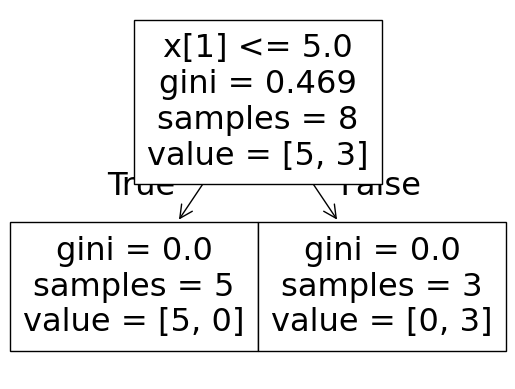

0.8


C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


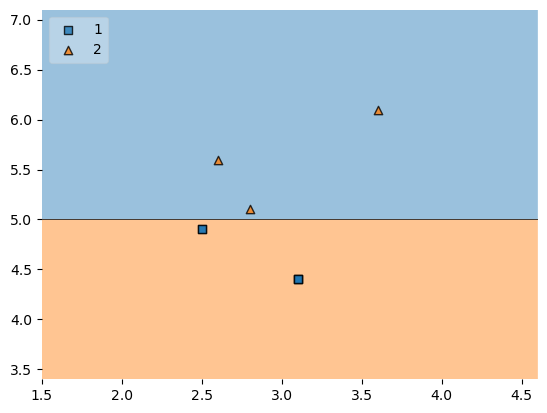

In [49]:
evaluate(dt_bag1 ,X,y)

In [50]:
#data for tree 1

In [51]:
df_bag = df_train.sample(8  , replace=True)

X = df_bag.iloc[:,:-1]
y= df_bag.iloc[:,-1]

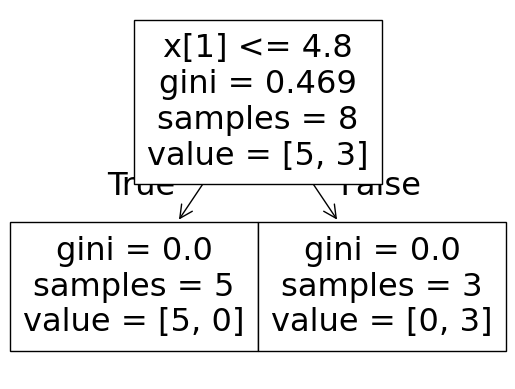

1.0


C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


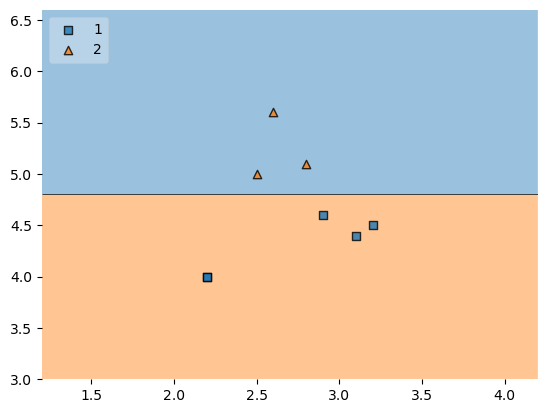

In [52]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2 , X ,y)

In [53]:
df_bag = df_train.sample(8  , replace=True)

X = df_bag.iloc[:,:-1]
y= df_bag.iloc[:,-1]

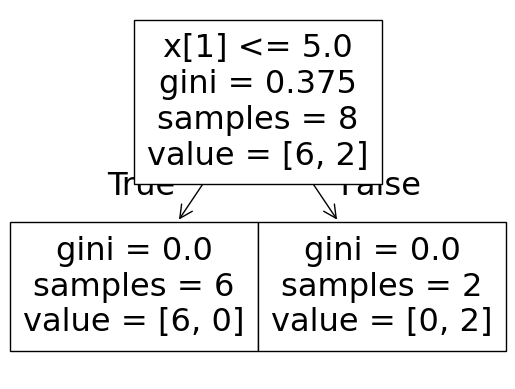

0.8


C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


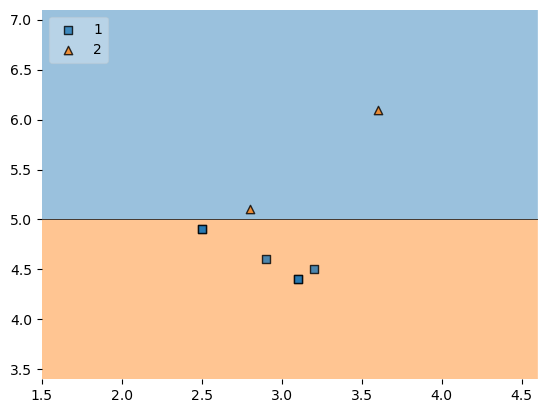

In [54]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3 , X ,y)

### Predict Test

In [55]:
df_test

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
128,2.8,5.6,2
52,3.1,4.9,1
101,2.7,5.1,2
96,2.9,4.2,1


In [59]:
print('pred1 : ' , dt_bag1.predict(np.array([2.7,5.1]).reshape(1,2)))
print('pred2 : ' , dt_bag2.predict(np.array([2.7,5.1]).reshape(1,2)))
print('pred : ' , dt_bag3.predict(np.array([2.7,5.1]).reshape(1,2)))

pred1 :  [2]
pred2 :  [2]
pred :  [2]


C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [60]:
# Row sampling without replacement
df_train

,sepal width (cm),petal length (cm),target
134,2.6,5.6,2
65,3.1,4.4,1
113,2.5,5.0,2
109,3.6,6.1,2
133,2.8,5.1,2
51,3.2,4.5,1
84,3.0,4.5,1
58,2.9,4.6,1
62,2.2,4.0,1
72,2.5,4.9,1


In [61]:

df_train.sample(8)

,sepal width (cm),petal length (cm),target
72,2.5,4.9,1
65,3.1,4.4,1
133,2.8,5.1,2
51,3.2,4.5,1
58,2.9,4.6,1
84,3.0,4.5,1
62,2.2,4.0,1
113,2.5,5.0,2
